┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2


Total counts: {'000': 5003, '111': 4997}
<class 'qiskit.result.counts.Counts'>


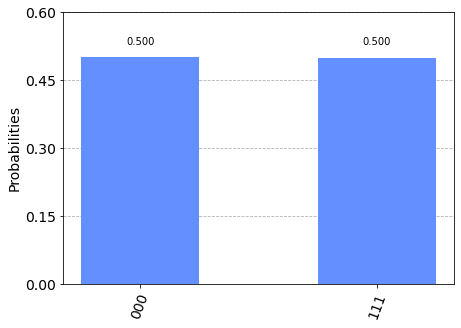

In [9]:
# Experiment 1
# %load entangle2.py
# %load Hgate.py
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(3,3)

# Add a H gate on qubit 0
qc.h(0)

qc.cx(0,1)
qc.cx(0,2)

qc.barrier()

# Map the quantum measurement from qubit 0 to the classical bit 0 
qc.measure([0,1,2], [0,1,2])

# Draw the circuit
display(qc.draw())


# Use Aer's qasm_simulator
simulator = QasmSimulator()

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)
print(type(counts))
plot_histogram(counts)


┌───┐                ░ ┌─┐         
q_0: ┤ H ├──■─────────────░─┤M├─────────
     └───┘┌─┴─┐           ░ └╥┘┌─┐      
q_1: ─────┤ X ├──■────────░──╫─┤M├──────
          └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
               └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                    └───┘ ░  ║  ║  ║ └╥┘
c: 4/════════════════════════╩══╩══╩══╩═
                             0  1  2  3


Total counts: {'1111': 4994, '0000': 5006}
<class 'qiskit.result.counts.Counts'>


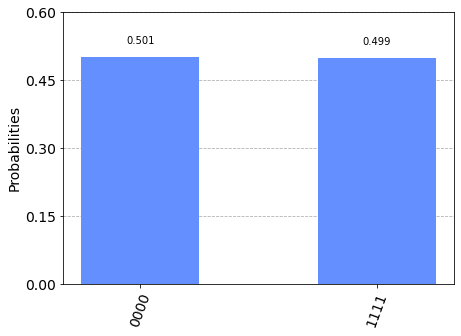

In [11]:
# Experiment 2
# %load entangle2.py
# %load Hgate.py
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(4,4)

# Add a H gate on qubit 0
qc.h(0)

qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)

qc.barrier()

# Map the quantum measurement from qubit 0 to the classical bit 0 
qc.measure([0,1,2,3], [0,1,2,3])

# Draw the circuit
display(qc.draw())


# Use Aer's qasm_simulator
simulator = QasmSimulator()

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)
print(type(counts))
plot_histogram(counts)


┌───┐      ░    
q_0: ┤ H ├──■───░────
     ├───┤  │   ░    
q_1: ┤ H ├──■───░────
     └───┘┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├─░─┤M├
          └───┘ ░ └╥┘
c: 1/══════════════╩═
                   0


Total counts: {'1': 2590, '0': 7410}
<class 'qiskit.result.counts.Counts'>


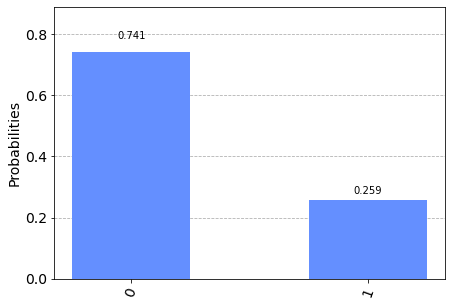

In [18]:
# Experiment 3
# %load entangle2.py
# %load Hgate.py
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(3,1)

# Add a H gate on qubit 0
qc.h(0)
qc.h(1)

qc.ccx(0,1,2)

qc.barrier()

# Map the quantum measurement from qubit 0 to the classical bit 0 
qc.measure([2],[0])

# Draw the circuit
display(qc.draw())


# Use Aer's qasm_simulator
simulator = QasmSimulator()

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)
print(type(counts))
plot_histogram(counts)


In [22]:
# %load ~cis492s/pub/ANDgate.py
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

## for display
from IPython.display import display

def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
    
    Returns:
        QuantumCircuit: Output AND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes
    qc.ccx(0,1,2)
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')


AND with inputs 0 0 gives output 0


░       ░    
q_0: ─|0>──░───■───░────
           ░   │   ░    
q_1: ─|0>──░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



AND with inputs 0 1 gives output 0


░       ░    
q_0: ─|0>───────░───■───░────
          ┌───┐ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 1 0 gives output 0


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          └───┘ ░   │   ░    
q_1: ─|0>───────░───■───░────
                ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 1 1 gives output 1


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          ├───┤ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

In [24]:
# %load ~cis492s/pub/ANDgate.py
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

## for display
from IPython.display import display

def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
    
    Returns:
        QuantumCircuit: Output AND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes
    qc.ccx(0,1,2)
    qc.x(2)
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')


AND with inputs 0 0 gives output 1


░            ░    
q_0: ─|0>──░───■────────░────
           ░   │        ░    
q_1: ─|0>──░───■────────░────
           ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 0 1 gives output 1


░            ░    
q_0: ─|0>───────░───■────────░────
          ┌───┐ ░   │        ░    
q_1: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ───────────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



AND with inputs 1 0 gives output 1


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░   │        ░    
q_1: ─|0>───────░───■────────░────
                ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ───────────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



AND with inputs 1 1 gives output 0


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          ├───┤ ░   │        ░    
q_1: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ───────────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0

In [27]:
# %load ~cis492s/pub/ORgate.py
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

## for display
from IPython.display import display

def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes
    qc.x(1)
    qc.x(0)
    qc.ccx(0,1,2)
    qc.x(2)





    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output## Test the function

for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')



OR with inputs 0 0 gives output 0


░ ┌───┐           ░    
q_0: ─|0>──░─┤ X ├──■────────░────
           ░ ├───┤  │        ░    
q_1: ─|0>──░─┤ X ├──■────────░────
           ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>──░──────┤ X ├┤ X ├─░─┤M├
           ░      └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



OR with inputs 0 1 gives output 1


░ ┌───┐           ░    
q_0: ─|0>───────░─┤ X ├──■────────░────
          ┌───┐ ░ ├───┤  │        ░    
q_1: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



OR with inputs 1 0 gives output 1


┌───┐ ░ ┌───┐           ░    
q_0: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ ├───┤  │        ░    
q_1: ─|0>───────░─┤ X ├──■────────░────
                ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



OR with inputs 1 1 gives output 1


┌───┐ ░ ┌───┐           ░    
q_0: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          ├───┤ ░ ├───┤  │        ░    
q_1: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0

In [31]:
# %load ~cis492s/pub/UNKNOWNfunc.py
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

## for display
from IPython.display import display

def UNKNOWN(inp1,inp2):
    """An unknown function 
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output the circuit.
        str: Output values measured from qubit 0 and qubit 1.
    """
  
    qc = QuantumCircuit(2, 2) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # add the code based on the circuit diagram in the handout
    qc.cx(0,1)
    qc.cx(1,0)
    qc.cx(0,1)

    
    # barrier between gate operation and measurement 
    qc.barrier()
    
    qc.measure([0,1],[0,1]) # output from qubit 0 and qubit 1 are measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    out = job.result().get_memory()[0]
  
    return qc, out

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, out = UNKNOWN(inp1, inp2)
        # the output string bit positions are reversed
        print('UNKNOWN func with inputs',inp1,inp2,'gives outputs',out[1],out[0])
        display(qc.draw())
        print('\n')



UNKNOWN func with inputs 0 0 gives outputs 0 0


░      ┌───┐      ░ ┌─┐   
q_0: ─|0>──░───■──┤ X ├──■───░─┤M├───
           ░ ┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─|0>──░─┤ X ├──■──┤ X ├─░──╫─┤M├
           ░ └───┘     └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1



UNKNOWN func with inputs 0 1 gives outputs 1 0


░      ┌───┐      ░ ┌─┐   
q_0: ─|0>───────░───■──┤ X ├──■───░─┤M├───
          ┌───┐ ░ ┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─|0>─┤ X ├─░─┤ X ├──■──┤ X ├─░──╫─┤M├
          └───┘ ░ └───┘     └───┘ ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1



UNKNOWN func with inputs 1 0 gives outputs 0 1


┌───┐ ░      ┌───┐      ░ ┌─┐   
q_0: ─|0>─┤ X ├─░───■──┤ X ├──■───░─┤M├───
          └───┘ ░ ┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─|0>───────░─┤ X ├──■──┤ X ├─░──╫─┤M├
                ░ └───┘     └───┘ ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1



UNKNOWN func with inputs 1 1 gives outputs 1 1


┌───┐ ░      ┌───┐      ░ ┌─┐   
q_0: ─|0>─┤ X ├─░───■──┤ X ├──■───░─┤M├───
          ├───┤ ░ ┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─|0>─┤ X ├─░─┤ X ├──■──┤ X ├─░──╫─┤M├
          └───┘ ░ └───┘     └───┘ ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [33]:
# %load ~cis492s/pub/UNKNOWNfunc.py
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

## for display
from IPython.display import display

def UNKNOWN(inp1,inp2):
    """An unknown function 
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output the circuit.
        str: Output values measured from qubit 0 and qubit 1.
    """
  
    qc = QuantumCircuit(2, 2) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # add the code based on the circuit diagram in the handout
    qc.h(0)
    qc.h(1)
    qc.cx(0,1)
    qc.h(0)
    qc.h(1)
    
    # barrier between gate operation and measurement 
    qc.barrier()
    
    qc.measure([0,1],[0,1]) # output from qubit 0 and qubit 1 are measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    out = job.result().get_memory()[0]
  
    return qc, out

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, out = UNKNOWN(inp1, inp2)
        # the output string bit positions are reversed
        print('UNKNOWN func with inputs',inp1,inp2,'gives outputs',out[1],out[0])
        display(qc.draw())
        print('\n')



UNKNOWN func with inputs 0 0 gives outputs 0 0


░ ┌───┐     ┌───┐ ░ ┌─┐   
q_0: ─|0>──░─┤ H ├──■──┤ H ├─░─┤M├───
           ░ ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐
q_1: ─|0>──░─┤ H ├┤ X ├┤ H ├─░──╫─┤M├
           ░ └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1



UNKNOWN func with inputs 0 1 gives outputs 1 1


░ ┌───┐     ┌───┐ ░ ┌─┐   
q_0: ─|0>───────░─┤ H ├──■──┤ H ├─░─┤M├───
          ┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐
q_1: ─|0>─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░──╫─┤M├
          └───┘ ░ └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1



UNKNOWN func with inputs 1 0 gives outputs 1 0


┌───┐ ░ ┌───┐     ┌───┐ ░ ┌─┐   
q_0: ─|0>─┤ X ├─░─┤ H ├──■──┤ H ├─░─┤M├───
          └───┘ ░ ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐
q_1: ─|0>───────░─┤ H ├┤ X ├┤ H ├─░──╫─┤M├
                ░ └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1



UNKNOWN func with inputs 1 1 gives outputs 0 1


┌───┐ ░ ┌───┐     ┌───┐ ░ ┌─┐   
q_0: ─|0>─┤ X ├─░─┤ H ├──■──┤ H ├─░─┤M├───
          ├───┤ ░ ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐
q_1: ─|0>─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░──╫─┤M├
          └───┘ ░ └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1